# Group Project Data Analytics EarthQuakes Mexico ![Mexico]
[Mexico]: https://flagcdn.com/40x30/mx.png

# 1 - Import Libraries and data

In [1]:
from datetime import datetime
import requests
import json
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('earthquakes mexico.tsv',sep='\t')

In [3]:
data

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,"[""Year >= 1900"",""Country = MEXICO""]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1900.0,1.0,20.0,6.0,33.0,30.0,NaN,NaN,MEXICO,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,NaN,1900.0,5.0,16.0,20.0,12.0,0.0,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1902.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,MEXICO: GUERRERO,...,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
4,NaN,1902.0,9.0,23.0,20.0,18.0,30.0,NaN,NaN,"MEXICO: VENUSTIANO CARRANZA,CHIAPAS,CHIS,TABASCO",...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,NaN,2020.0,6.0,23.0,15.0,29.0,5.0,5751.0,NaN,MEXICO: OAXACA,...,NaN,NaN,24.0,1.0,NaN,4.0,NaN,NaN,8123.0,4.0
110,NaN,2021.0,9.0,8.0,1.0,47.0,47.0,5806.0,NaN,MEXICO: GUERRERO,...,NaN,NaN,NaN,1.0,200.0,4.0,NaN,NaN,7317.0,4.0
111,NaN,2022.0,5.0,25.0,21.0,43.0,2.0,5850.0,NaN,MEXICO: OAXACA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,2022.0,9.0,19.0,18.0,5.0,6.0,5859.0,NaN,"MEXICO: MICHOACAN, COLIMA, JALISCO",...,NaN,NaN,10.0,1.0,25.0,4.0,800.0,NaN,6084.0,4.0


# 2 - Extract all the pieces information that are needed and Transform the dataset

In [4]:
data = data.drop(['Search Parameters', 'Sec'], axis=1) # We drop the Search Parameters and sec (seconds) columns that we will not use in our data set

In [5]:
data = data.drop(0,axis=0)   # Drop of the first row (full nan)

In [6]:
data.loc[:, ['Hr', 'Mn']] = data.loc[:, ['Hr', 'Mn']].fillna(0) # Fill with 0 nan on Hr and Mn

In [7]:
data.head()

,Year,Mo,Dy,Hr,Mn,Tsu,Vol,Location Name,Latitude,Longitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,1900.0,1.0,20.0,6.0,33.0,NaN,NaN,MEXICO,20.0,-105.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1900.0,5.0,16.0,20.0,12.0,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,20.0,-105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1902.0,1.0,16.0,0.0,0.0,NaN,NaN,MEXICO: GUERRERO,17.6,-99.7,...,NaN,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN
4,1902.0,9.0,23.0,20.0,18.0,NaN,NaN,"MEXICO: VENUSTIANO CARRANZA,CHIAPAS,CHIS,TABASCO",16.6,-92.6,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,1902.0,12.0,12.0,23.0,10.0,NaN,NaN,MEXICO: BAJA CALIFORNIA,29.0,-114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 1 to 113
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                113 non-null    float64
 1   Mo                                  113 non-null    float64
 2   Dy                                  113 non-null    float64
 3   Hr                                  113 non-null    float64
 4   Mn                                  113 non-null    float64
 5   Tsu                                 37 non-null     float64
 6   Vol                                 1 non-null      float64
 7   Location Name                       113 non-null    object 
 8   Latitude                            113 non-null    float64
 9   Longitude                           113 non-null    float64
 10  Focal Depth (km)                    90 non-null     float64
 11  Mag                                 104 non-n

We combine the Year, Mo, Dy, Hr and Mn columns to a general datetime

In [9]:
# Function to create datetime objects
def create_datetime(row):
    if pd.isnull(row['Year']) or pd.isnull(row['Mo']) or pd.isnull(row['Dy']):
        return pd.NaT
    return datetime(int(row['Year']), int(row['Mo']), int(row['Dy']), int(row['Hr']), int(row['Mn']))

# Create column of combined date and time
data['Datetime'] = data.apply(create_datetime, axis=1)

In [10]:
# Dropped Year Mo Dy Hr and Mn columns to keep only datetime in replacement.
data.drop(['Year', 'Mo', 'Dy', 'Hr', 'Mn'], axis=1, inplace=True)

In [11]:
data

,Tsu,Vol,Location Name,Latitude,Longitude,Focal Depth (km),Mag,MMI Int,Deaths,Death Description,...,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description,Datetime
1,NaN,NaN,MEXICO,20.000,-105.000,10.0,7.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1900-01-20 06:33:00
2,NaN,NaN,MEXICO: NEAR COAST OF JALISCO,20.000,-105.000,60.0,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-05-16 20:12:00
3,NaN,NaN,MEXICO: GUERRERO,17.600,-99.700,NaN,7.0,NaN,2.0,1.0,...,NaN,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1902-01-16 00:00:00
4,NaN,NaN,"MEXICO: VENUSTIANO CARRANZA,CHIAPAS,CHIS,TABASCO",16.600,-92.600,100.0,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1902-09-23 20:18:00
5,NaN,NaN,MEXICO: BAJA CALIFORNIA,29.000,-114.000,60.0,7.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902-12-12 23:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,5751.0,NaN,MEXICO: OAXACA,16.029,-95.901,26.0,7.4,NaN,10.0,1.0,...,NaN,24.0,1.0,NaN,4.0,NaN,NaN,8123.0,4.0,2020-06-23 15:29:00
110,5806.0,NaN,MEXICO: GUERRERO,16.982,-99.773,20.0,7.0,7.0,3.0,1.0,...,NaN,NaN,1.0,200.0,4.0,NaN,NaN,7317.0,4.0,2021-09-08 01:47:00
111,5850.0,NaN,MEXICO: OAXACA,16.325,-95.856,34.0,5.5,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-25 21:43:00
112,5859.0,NaN,"MEXICO: MICHOACAN, COLIMA, JALISCO",18.367,-103.252,15.0,7.6,9.0,2.0,1.0,...,NaN,10.0,1.0,25.0,4.0,800.0,NaN,6084.0,4.0,2022-09-19 18:05:00


In [12]:
# Replace null values ​​in 'Tsu' and 'Vol' (Tsunami and Volcano) and assign  true or false
data.loc[:,'Tsu'] = data['Tsu'].notnull()
data.loc[:,'Vol'] = data['Vol'].notnull()

Assigning the columns to a neater place

In [13]:
columns = data.columns.tolist()
column_to_move = columns.pop(columns.index('Datetime'))
columns.insert(0, column_to_move)
data = data[columns]

In [14]:
columns = data.columns.tolist()
column_to_move = columns.pop(columns.index('Location Name'))
columns.insert(1, column_to_move)
data = data[columns]

Text(0, 0.5, 'Number of times')

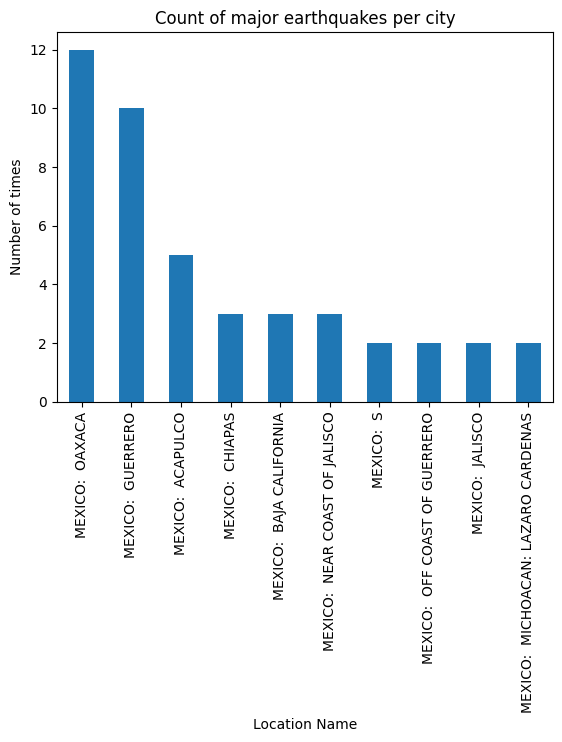

In [15]:
# Largest number of major earthquakes per city in the last 120 years

ax= data['Location Name'].value_counts() \
    .head(10) \
    .plot(kind='bar',title='Count of major earthquakes per city')

ax.set_xlabel('Location Name')
ax.set_ylabel('Number of times')

# 3 - Import the dataframe into .csv file

In [16]:
data.to_csv(r'data mexico for analysis.csv',index=False, header=True)